<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-AS-and-Phillips-Curves" data-toc-modified-id="The-AS-and-Phillips-Curves-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The AS and Phillips Curves</a></span><ul class="toc-item"><li><span><a href="#Writing-Functions" data-toc-modified-id="Writing-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Writing Functions</a></span><ul class="toc-item"><li><span><a href="#Assignment-1:-Phillips-Curve-Function" data-toc-modified-id="Assignment-1:-Phillips-Curve-Function-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Assignment 1: Phillips Curve Function</a></span></li></ul></li><li><span><a href="#Plotting-the-Curves" data-toc-modified-id="Plotting-the-Curves-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting the Curves</a></span><ul class="toc-item"><li><span><a href="#Discussion-Questions" data-toc-modified-id="Discussion-Questions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Discussion Questions</a></span></li><li><span><a href="#Assignment:-Intuition-Building" data-toc-modified-id="Assignment:-Intuition-Building-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Assignment: Intuition Building</a></span></li></ul></li><li><span><a href="#Shock-Analysis" data-toc-modified-id="Shock-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Shock Analysis</a></span></li></ul></li><li><span><a href="#Adding-the-AD-Curve" data-toc-modified-id="Adding-the-AD-Curve-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adding the AD Curve</a></span><ul class="toc-item"><li><span><a href="#Assignment:-Solve-for-$\pi(Y)$" data-toc-modified-id="Assignment:-Solve-for-$\pi(Y)$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assignment: Solve for $\pi(Y)$</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plot_defaults = {
    'figure.figsize':(8,8),
    'figure.facecolor':'white',
    'axes.grid':True,
    'grid.linewidth':0.5,
    'grid.linestyle':'--',
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False
}

plt.rcParams.update(plot_defaults)

# The AS and Phillips Curves

We saw in the other notebook that the Phillips Curve links inflation and the unemployment rate:

$$\pi = b U_{\text{gap}} + \pi^e$$

* **Question**: What is the sign of $b$?

Recall from the 1st TD that the AS curve links inflation (prices) to total output (supply). We can convert the Phillips curve to the AS curve using Okun's Law, which posits a linear relationship between $U_{\text{gap}}$ and $Y_{\text{gap}}$:

$$U_{\text{gap}} = hY_{\text{gap}}$$

* **Question**: What is the sign of $h$?

Which implies the following AS curve:

$$\pi = a Y_{\text{gap}} + \pi^e$$

* **Question**: What is the sign of $a$?

## Writing Functions

In Python a function is declared using `def`, followed by a name and a list of parameters to the function. You can give parameters default values using `=`. Here is a function that takes $a$, $Y$, $\bar{Y}$, $\pi^e$, and a shock $s$, and computes the AS curve: 

In [2]:
def AS_curve(Y, a, Y_bar, pi_e, s=0):
    Y_gap = (Y - Y_bar) / Y_bar
    return a * Y_gap + pi_e + s

### Assignment 1: Phillips Curve Function

Write a function that computes the Phillips curve, given parameters $b$, $U$, $\bar U$, and $\pi^e$. Assume $U_\text{gap} = U - \bar U$

In [3]:
### YOUR CODE HERE

## Plotting the Curves

In [4]:
def add_point_of_interest(ax, x, y):
    '''
    Add a dot at the point (x, y), with dotted lines leading to the two axes.
    '''
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    ax.vlines(x, ymin=ymin, ymax=y, ls='--', color='k')
    ax.hlines(y, xmin=xmin, xmax=x, ls='--', color='k')
    ax.scatter(x, y, zorder=10, color='k')

In [5]:
def plot_AS_PC_curves(Y_values, U_values, Y_bar, U_bar, a, b, pi_e, s=0, ax=None, 
                      AS_draw_equlibrium=True,
                      PC_draw_equlibrium=True,
                      legend=False,
                      labels=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(14,4))
    
    if labels is None:
        labels = ['AS Curve', 'Phillips Curve']
        
    pi_bar = AS_curve(a=a, Y=Y_bar, Y_bar = Y_bar, pi_e=pi_e, s=s)
    ax[0].plot(Y_values, AS_curve(a=a, Y=Y_values, Y_bar = Y_bar, pi_e=pi_e, s=s), label=labels[0])
    ax[0].set(xlabel='Output', ylabel='Inflation', title='AS Curve')
    
    if AS_draw_equlibrium:
        add_point_of_interest(ax[0], Y_bar, pi_bar)

    pi_bar = phillips_curve(b=b, U=U_bar, U_bar = U_bar, pi_e=pi_e, s=s)
    ax[1].plot(U_values, phillips_curve(b=b, U=U_values, U_bar = U_bar, pi_e=pi_e, s=s), label=labels[1])
    ax[1].set(xlabel='Unemployment', ylabel='Inflation', title='Phillips Curve')
    
    if PC_draw_equlibrium:
        add_point_of_interest(ax[1], U_bar, pi_bar)
        
    if legend:
        ax[0].legend()
        ax[1].legend()
        
    return ax

In [6]:
a = 1 # From linear AS curve, Y = a * Y_gap -- Free Choice
h = -0.33 # From Okun's Law, U_gap = h * Y_gap -- Free Choice
pi_e = 1 # Free Choice

Y_values = np.linspace(0.95, 1.05, 100)
Y_bar = 1 # Free Choice
Y_gap = (Y_values - Y_bar) / Y_bar # Convert to a rate

U_gap = h * Y_gap # Okun's Law
b = a / h # Substitute Okun's law into AS curve

U_bar = 0.06 # Free Choice
U_values = U_gap + U_bar

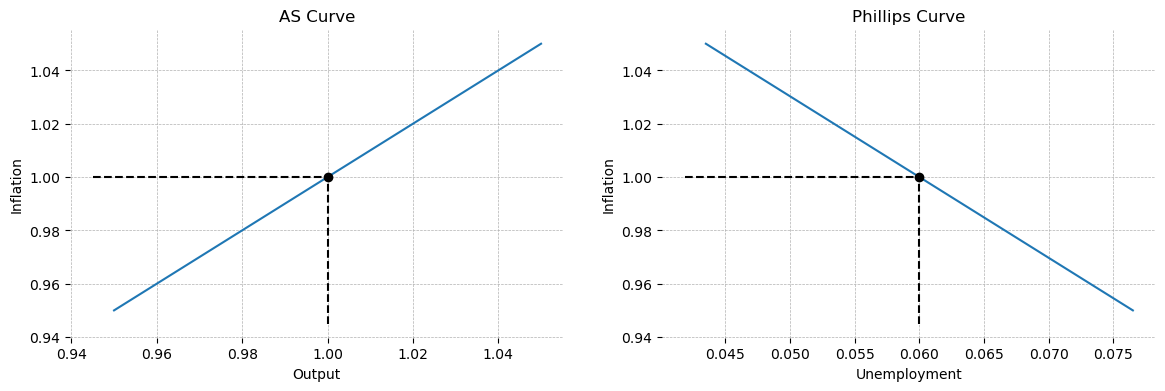

In [7]:
ax = plot_AS_PC_curves(Y_values, U_values, Y_bar, U_bar, a, b, pi_e)
plt.show()

### Discussion Questions
1. What is the significant of the point (1, 1) on the AS Curve, and the point (0.06, 1) on the Phillips curve?
2. What is the equlibrium rate of inflation implied by this economy? Where did this number come from?
3. What is the equlibrium level of output, and the equlibrium unemployment rate? How did these values come about?

### Assignment: Intuition Building

Re-draw the plots above with different values of $\bar U$, $\bar Y$, $a$, $h$, and $\pi^e$. Note the effects on the equlibrium values you find.

## Shock Analysis

The modern view of the Phillips Curve assumes that the economy is a stable dynamic system.

* **Question**: What does stablility mean in the context of a dynamic system?


This assumption implies that in the long run, absent any shocks, the economy will return to a steady state. 
* **Question**: What is the steady state in this model?

In [8]:
a = 0.6 # From linear AS curve, Y = a * Y_gap -- Free Choice
h = -0.33 # From Okun's Law, U_gap = h * Y_gap -- Free Choice
pi_e = 1.02 # Free Choice

Y_values = np.linspace(0.5, 1.05, 100)
Y_bar = 0.87 # Free Choice
Y_gap = (Y_values - Y_bar) / Y_bar # Convert to a rate

U_gap = h * Y_gap # Okun's Law
b = a / h # Substitute Okun's law into AS curve

U_bar = 0.06 # Free Choice
U_values = U_gap + U_bar

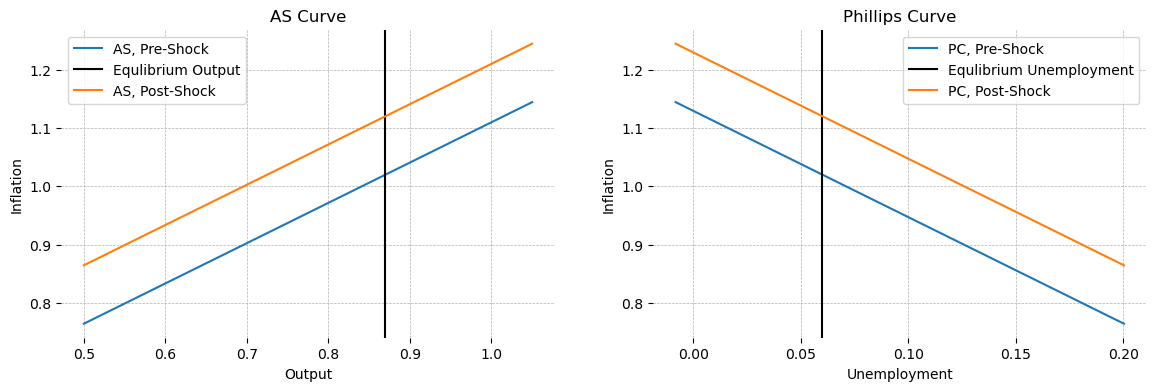

In [9]:
ax = plot_AS_PC_curves(Y_values, U_values, Y_bar, U_bar, a, b, pi_e, AS_draw_equlibrium=False, PC_draw_equlibrium=False,
                       labels=['AS, Pre-Shock', 'PC, Pre-Shock'])
ax[0].axvline(Y_bar, color='k', label ='Equlibrium Output')
ax[1].axvline(U_bar, color='k', label ='Equlibrium Unemployment')

Y_a = 0.7
s = 0.1

pi_a = AS_curve(a, Y_a, Y_bar, pi_e)
ax = plot_AS_PC_curves(Y_values, U_values, Y_bar, U_bar, a, b, pi_e, s=s, ax=ax, AS_draw_equlibrium=False, PC_draw_equlibrium=False, legend=True,
                       labels=['AS, Post-Shock', 'PC, Post-Shock'])

plt.show()

# Adding the AD Curve

You saw in lecture 2 weeks ago that the AD curve comes from a full Taylor Rule:

$$i = \bar i + \alpha (\pi - \bar \pi) + \beta \left (\frac{Y - \bar Y}{\bar Y} \right )$$

And the usual Keyensian demand functions:

$$\begin{align} Y &= C + I + G \\
                C &= c_0 + c_1(Y - T) \\
                I &= i_0 + i_1Y + i_2 i \\
                G &= \bar G \end{align}$$
                
Recall that this implies the following supply function:

$$i = \frac{1}{i_2}\left (\frac{Y}{K} - A \right ) $$

with $A = c_0 + i_0 + \bar G - c_1 T$ and $K = \frac{1}{1 - c_1 - i_1}$

(**Please verify these equations!**)

## Assignment: Solve for $\pi(Y)$

The IS and TR curves can be combined into a single function that gives inflation as a function of output. Please find it!

In [10]:
import sympy as sp

Y, π, π_bar, Y_bar, G_bar, T, i, i_bar  = sp.symbols(['Y', 'pi', r'\bar{\pi}', r'\bar{Y}', r'\bar{G}', 'T', 'i', r'\bar{i}'])
c0, c1, i0, i1, i2, α, β = sp.symbols(['c_0', 'c_1', 'i_0', 'i_1', 'i_2', r'\alpha', r'\beta'])

C = c0 + c1 * (Y - T)
I = i0 + i1 * Y + i2 * i
i = sp.solve(Y - C - I - G_bar, i)[0]
i.collect(Y)

(T*c_1 + Y*(-c_1 - i_1 + 1) - \bar{G} - c_0 - i_0)/i_2

In [11]:
K = sp.Symbol('K')
A = sp.Symbol('A')
i = i.collect(Y).replace(1 - c1 - i1, 1/K).subs({c0 + i0 + G_bar - c1 * T:A})
i

(-A + Y/K)/i_2

In [12]:
tr = i_bar + α * (π - π_bar) + β * (Y - Y_bar) / Y_bar

In [13]:
AD = sp.solve(i - tr, π)[0].collect(Y)
AD

-A/(\alpha*i_2) + Y*(-\beta/(\alpha*\bar{Y}) + 1/(K*\alpha*i_2)) + \bar{\pi} - \bar{i}/\alpha + \beta/\alpha

# IS-TR-AD Plots

In [14]:
sp_AD_curve = sp.lambdify([Y, A, K, α, β, i2, π_bar, i_bar, Y_bar], AD)

def AD_curve(Y, π_bar, Y_bar, G_bar, T, i_bar, c0, c1, i0, i1, i2, α, β):
    A = c0 + i0 + G_bar - c1 * T
    K = 1 / (1 - c1 - i1)
    
    return sp_AD_curve(Y, A, K, α, β, i2, π_bar, i_bar, Y_bar)

def IS_curve(Y, G_bar, T, c0, c1, i0, i1, i2):
    K = 1 / (1 - c1 - i1)
    A = c0 + i0 + G_bar - c1 * T
    
    return 1 / i2 * (Y / K - A)

def taylor_rule(Y, pi, i_bar, Y_bar, π_bar, α, β):
    output_gap = (Y - Y_bar) / Y_bar
    pi_gap = pi - π_bar
    
    return i_bar + α * pi_gap + β * output_gap

In [15]:
Y_values = np.linspace(1, 5, 100)


π_bar = 0.05
Y_bar = 1
G_bar = 0.4
T = 0.5
i_bar = 0.15               
c0 = 1
c1 = 0.4
i0 = 1
i1 = 0.3
i2 = -0.9
α = 0.85
β = 0.3


def plot_IS_TR_AD(Y_values, π, π_bar, Y_bar, G_bar, T, i_bar, c0, c1, i0, i1, i2, α, β, 
                  ax=None, draw_equlibrium=True, legend=True):
    is_curve = IS_curve(Y_values, G_bar=G_bar, T=T, c0=c0, c1=c1, i0=i0, i1=i1, i2=i2)
    tr_curve = taylor_rule(Y_values, pi=π, i_bar=i_bar, Y_bar=Y_bar, π_bar=π_bar, α=α, β=β)
    ad_curve = AD_curve(Y=Y_values, π_bar=π_bar, Y_bar=Y_bar, G_bar=G_bar, T=T,
                        i_bar = i_bar, α=α, β=β,
                        c0=c0, c1=c1, 
                        i0=i0, i1=i1, i2=i2)
    
    if ax is None:
        fig, ax = plt.subplots(2, 1, figsize=(6,10), sharex=True)
        
    ax[0].plot(Y_values, is_curve, color='tab:blue',
               label = 'IS Curve' if legend else None)
    ax[0].plot(Y_values, tr_curve, color='tab:orange',
               label = r'TR Curve' if legend else None)
    ax[0].set(ylabel='Nominal Interest Rate (i)', title='IS-TR')
    if legend:
        ax[0].legend()
    
    ax[1].plot(Y_values, ad_curve, color='tab:blue')

    if draw_equlibrium:
        eq_idx = np.argmin((is_curve - tr_curve) ** 2)
        Y_star = Y_values[eq_idx]
        pi_star = is_curve[eq_idx]
        add_point_of_interest(ax[0], Y_star, pi_star)

        xmin, xmax = ax[0].get_xlim()

        ax[1].hlines(ad_curve[eq_idx], xmin, Y_star, ls='--', color='k')
        ax[1].scatter(Y_star, ad_curve[eq_idx], zorder=10, color='k')
        ax[1].set(xlabel='Output', ylabel='Inflation (π)', title='Aggregate Demand')
        ax[1].axvline(Y_star, ls='--', c='k')
    
    ax[0].set_xlim(xmin, xmax)

    return ax

## Shock Simulations

Effect of an inflation shock:

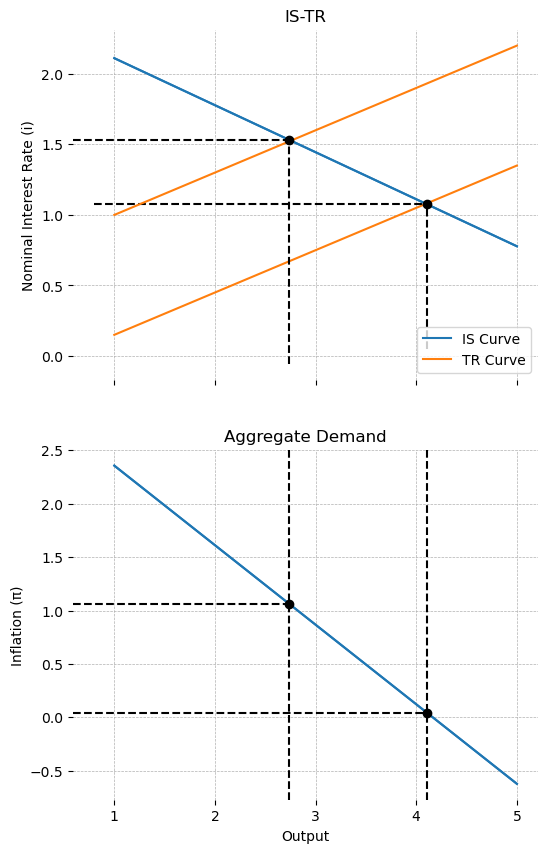

In [16]:
ax = plot_IS_TR_AD(Y_values, π_bar, π_bar, Y_bar, G_bar, T, i_bar, c0, c1, i0, i1, i2, α, β)
plot_IS_TR_AD(Y_values, π_bar + 1, π_bar, Y_bar, G_bar, T, i_bar, c0, c1, i0, i1, i2, α, β, 
              ax=ax,
              legend=False)
plt.show()

### Assignmentt

Simulate a government spending shock. Which curves shift and why? Describe what the model predicts will happen to inflation and interest rates.

# AS-AD Plots

In [17]:
def plot_AS_AD(Y_values, π, π_bar, Y_bar, G_bar, T, i_bar, c0, c1, i0, i1, i2, α, β, 
            a, pi_e, s, ax=None, plot_long_run=True, legend=True):
    as_curve = AS_curve(Y=Y_values, a=a, Y_bar=Y_bar, pi_e=pi_e, s=s)
    ad_curve = AD_curve(Y=Y_values, π_bar=π_bar, Y_bar=Y_bar, G_bar=G_bar, T=T,
                        i_bar = i_bar, α=α, β=β,
                        c0=c0, c1=c1, 
                        i0=i0, i1=i1, i2=i2)
        
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.plot(Y_values, as_curve, label='AS Curve' if legend else None, color='tab:blue')
    ax.plot(Y_values, ad_curve, label='AD Curve' if legend else None, color='tab:orange')
    ax.set(xlabel='Output', ylabel='Inflation (π)', title='AS-AD')

    if plot_long_run:
        eq_idx = np.argmin((as_curve - ad_curve) ** 2)
        Y_star = Y_values[eq_idx]
        pi_star = as_curve[eq_idx]

        ax.axhline(π_bar, label='Long Run AD' if legend else None, color='tab:red')
        ax.axvline(Y_bar, label='Long Run AS' if legend else None, color='tab:green')
    
    if legend:
        ax.legend()
    return ax

## Equlibrium

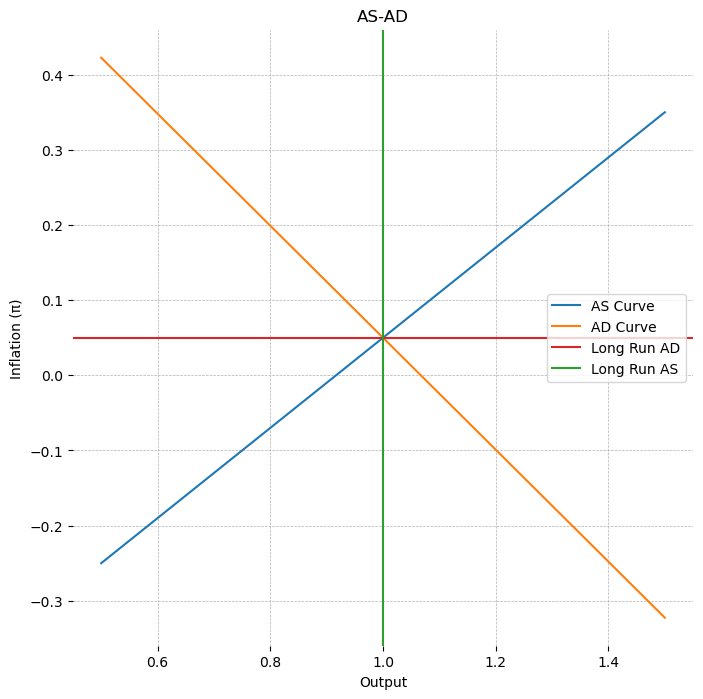

In [18]:
Y_values = np.linspace(0.5, 1.5, 1000)
π_bar = 0.05
ax = plot_AS_AD(Y_values, π=π_bar, π_bar=π_bar, Y_bar=Y_bar, G_bar=0, T=0, 
                i_bar=π_bar, α=α, β=β,
                c0=0.345, c1=c1, i0=0, i1=i1, i2=i2,  
                a=a, pi_e=π_bar, s=0)

plt.show()

## Expectation Shock

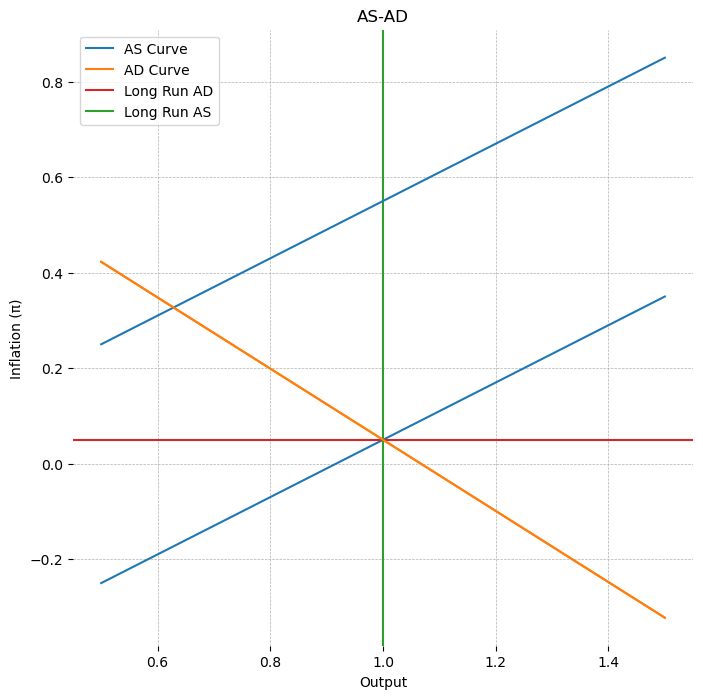

In [19]:
ax = plot_AS_AD(Y_values, π=π_bar, π_bar=π_bar, Y_bar=Y_bar, G_bar=0, T=0, 
                i_bar=π_bar, α=α, β=β,
                c0=0.345, c1=c1, i0=0, i1=i1, i2=i2,  
                a=a, pi_e=π_bar, s=0)

ax = plot_AS_AD(Y_values, π=π_bar, π_bar=π_bar, Y_bar=Y_bar, G_bar=0, T=0, 
                i_bar=π_bar, α=α, β=β,
                c0=0.345, c1=c1, i0=0, i1=i1, i2=i2,  
                a=a, pi_e=π_bar + 0.5, s=0, ax=ax,
                legend=False,
                plot_long_run=False)


plt.show()